In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller 
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates

In [13]:
import warnings
warnings.filterwarnings("ignore")

# Analisis Preliminar Datos para ML - Series de Tiempo

In [14]:
taxis = pd.read_parquet('../ETL/taxis_def.parquet')

In [15]:
taxis

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,type,trip_type,pickup_datetime,dropoff_datetime,duration
0,1,0.80,1.0,N,163,230,3,6.50,3.5,0.5,...,0.0,1.0,11.50,2.5,0.0,yellow,1.0,2023-09-01 00:15:37,2023-09-01 00:20:21,4.733333
1,2,2.34,1.0,N,236,233,2,14.20,1.0,0.5,...,0.0,1.0,21.20,2.5,0.0,yellow,1.0,2023-09-01 00:18:40,2023-09-01 00:30:28,11.800000
2,1,1.62,1.0,N,162,236,2,8.60,1.0,0.5,...,0.0,1.0,15.60,2.5,0.0,yellow,1.0,2023-09-01 00:35:01,2023-09-01 00:39:04,4.050000
3,1,0.74,1.0,N,141,229,2,5.10,1.0,0.5,...,0.0,1.0,11.10,2.5,0.0,yellow,1.0,2023-09-01 00:45:45,2023-09-01 00:47:37,1.866667
7,1,3.90,1.0,N,140,7,2,20.50,3.5,0.5,...,0.0,1.0,31.85,2.5,0.0,yellow,1.0,2023-09-01 00:01:04,2023-09-01 00:18:36,17.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40176764,1,5.25,1.0,N,116,140,2,32.36,0.0,0.5,...,0.0,1.0,43.93,2.5,0.0,green,1.0,2024-08-31 19:11:32,2024-08-31 19:29:47,18.250000
40176767,1,1.78,1.0,N,129,7,2,17.86,0.0,0.0,...,0.0,1.0,21.86,2.5,0.0,green,1.0,2024-08-31 21:39:00,2024-08-31 21:56:00,17.000000
40176768,1,3.27,1.0,N,255,65,2,23.95,0.0,0.0,...,0.0,1.0,29.84,2.5,0.0,green,1.0,2024-08-31 22:59:00,2024-08-31 23:19:00,20.000000
40176769,1,2.50,1.0,N,244,41,2,20.09,0.0,0.0,...,0.0,1.0,21.09,2.5,0.0,green,1.0,2024-08-31 22:26:00,2024-08-31 22:42:00,16.000000


# Series de Tiempo

In [16]:
taxis.drop(columns=['store_and_fwd_flag','extra','fare_amount','mta_tax','tip_amount',
                    'tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee','RatecodeID'], inplace=True)

In [17]:
taxis['type'] = taxis['type'].apply(lambda x : 1 if x=='yellow' else 2)

In [18]:
taxis['n_trips'] = 1

In [19]:
taxis

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,type,trip_type,pickup_datetime,dropoff_datetime,duration,n_trips
0,1,0.80,163,230,3,11.50,1,1.0,2023-09-01 00:15:37,2023-09-01 00:20:21,4.733333,1
1,2,2.34,236,233,2,21.20,1,1.0,2023-09-01 00:18:40,2023-09-01 00:30:28,11.800000,1
2,1,1.62,162,236,2,15.60,1,1.0,2023-09-01 00:35:01,2023-09-01 00:39:04,4.050000,1
3,1,0.74,141,229,2,11.10,1,1.0,2023-09-01 00:45:45,2023-09-01 00:47:37,1.866667,1
7,1,3.90,140,7,2,31.85,1,1.0,2023-09-01 00:01:04,2023-09-01 00:18:36,17.533333,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40176764,1,5.25,116,140,2,43.93,2,1.0,2024-08-31 19:11:32,2024-08-31 19:29:47,18.250000,1
40176767,1,1.78,129,7,2,21.86,2,1.0,2024-08-31 21:39:00,2024-08-31 21:56:00,17.000000,1
40176768,1,3.27,255,65,2,29.84,2,1.0,2024-08-31 22:59:00,2024-08-31 23:19:00,20.000000,1
40176769,1,2.50,244,41,2,21.09,2,1.0,2024-08-31 22:26:00,2024-08-31 22:42:00,16.000000,1


In [20]:
taxis_s = taxis.drop(columns=['PULocationID','DOLocationID','dropoff_datetime','payment_type','type','trip_type'])

In [21]:
taxis_s

,passenger_count,trip_distance,total_amount,pickup_datetime,duration,n_trips
0,1,0.80,11.50,2023-09-01 00:15:37,4.733333,1
1,2,2.34,21.20,2023-09-01 00:18:40,11.800000,1
2,1,1.62,15.60,2023-09-01 00:35:01,4.050000,1
3,1,0.74,11.10,2023-09-01 00:45:45,1.866667,1
7,1,3.90,31.85,2023-09-01 00:01:04,17.533333,1
...,...,...,...,...,...,...
40176764,1,5.25,43.93,2024-08-31 19:11:32,18.250000,1
40176767,1,1.78,21.86,2024-08-31 21:39:00,17.000000,1
40176768,1,3.27,29.84,2024-08-31 22:59:00,20.000000,1
40176769,1,2.50,21.09,2024-08-31 22:26:00,16.000000,1


In [22]:
diario = taxis_s.resample('D', on = 'pickup_datetime').sum()

In [23]:
diario

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-08-25,1,1.80,16.32,9.383333,1
2023-08-26,4,18.63,114.42,55.433333,4
2023-08-27,0,0.00,0.00,0.000000,0
2023-08-28,2,0.01,22.80,0.066667,2
2023-08-29,1,4.04,30.24,10.416667,1
...,...,...,...,...,...
2024-09-06,0,0.00,0.00,0.000000,0
2024-09-07,0,0.00,0.00,0.000000,0
2024-09-08,0,0.00,0.00,0.000000,0


In [24]:
semanal = taxis_s.resample('W', on = 'pickup_datetime').sum()

In [25]:
semanal.head()

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-08-27,5,20.43,130.74,6.481667e+01,5
2023-09-03,292416,404505.92,4131417.40,2.397677e+06,204372
2023-09-10,846917,1183730.94,13663815.06,8.479715e+06,643151
2023-09-17,860067,1215057.15,14395656.38,9.061134e+06,665479
2023-09-24,379317,536201.11,6733854.78,4.294240e+06,306965


In [26]:
mensual = taxis_s.resample('M', on = 'pickup_datetime').sum()

In [27]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-08-31,39,67.19,571.24,3.238167e+02,24
2023-09-30,3103349,4354006.61,50978081.73,3.171371e+07,2383407
2023-10-31,3898868,5472308.86,63778214.48,3.970597e+07,2978961
2023-11-30,3726416,5136505.72,60388236.66,3.754072e+07,2841540
2023-12-31,3890520,5266948.52,61323166.56,3.819132e+07,2878259
2024-01-31,3310266,4670785.61,51801929.35,3.013794e+07,2567477
2024-02-29,3341622,4790656.33,53447385.19,3.177544e+07,2618823
2024-03-31,3916080,5804068.48,63395507.19,3.847457e+07,3086307
2024-04-30,3809875,5778995.02,62516945.41,3.832527e+07,3012148


Se borro agosto del 2023 y septiembre del 2024

In [28]:
diario.drop(diario[(diario.index.year==2023)&(diario.index.month==8)].index,inplace=True)
diario.drop(diario[(diario.index.year==2024)&(diario.index.month==9)].index,inplace=True)

In [29]:
semanal.drop(semanal[(semanal.index.year==2023)&(semanal.index.month==8)].index,inplace=True)
semanal.drop(semanal[(semanal.index.year==2024)&(semanal.index.month==9)].index,inplace=True)

In [30]:
mensual.drop(mensual[(mensual.index.year==2023)&(mensual.index.month==8)].index,inplace=True)
mensual.drop(mensual[(mensual.index.year==2024)&(mensual.index.month==9)].index,inplace=True)

## Estacionalidad

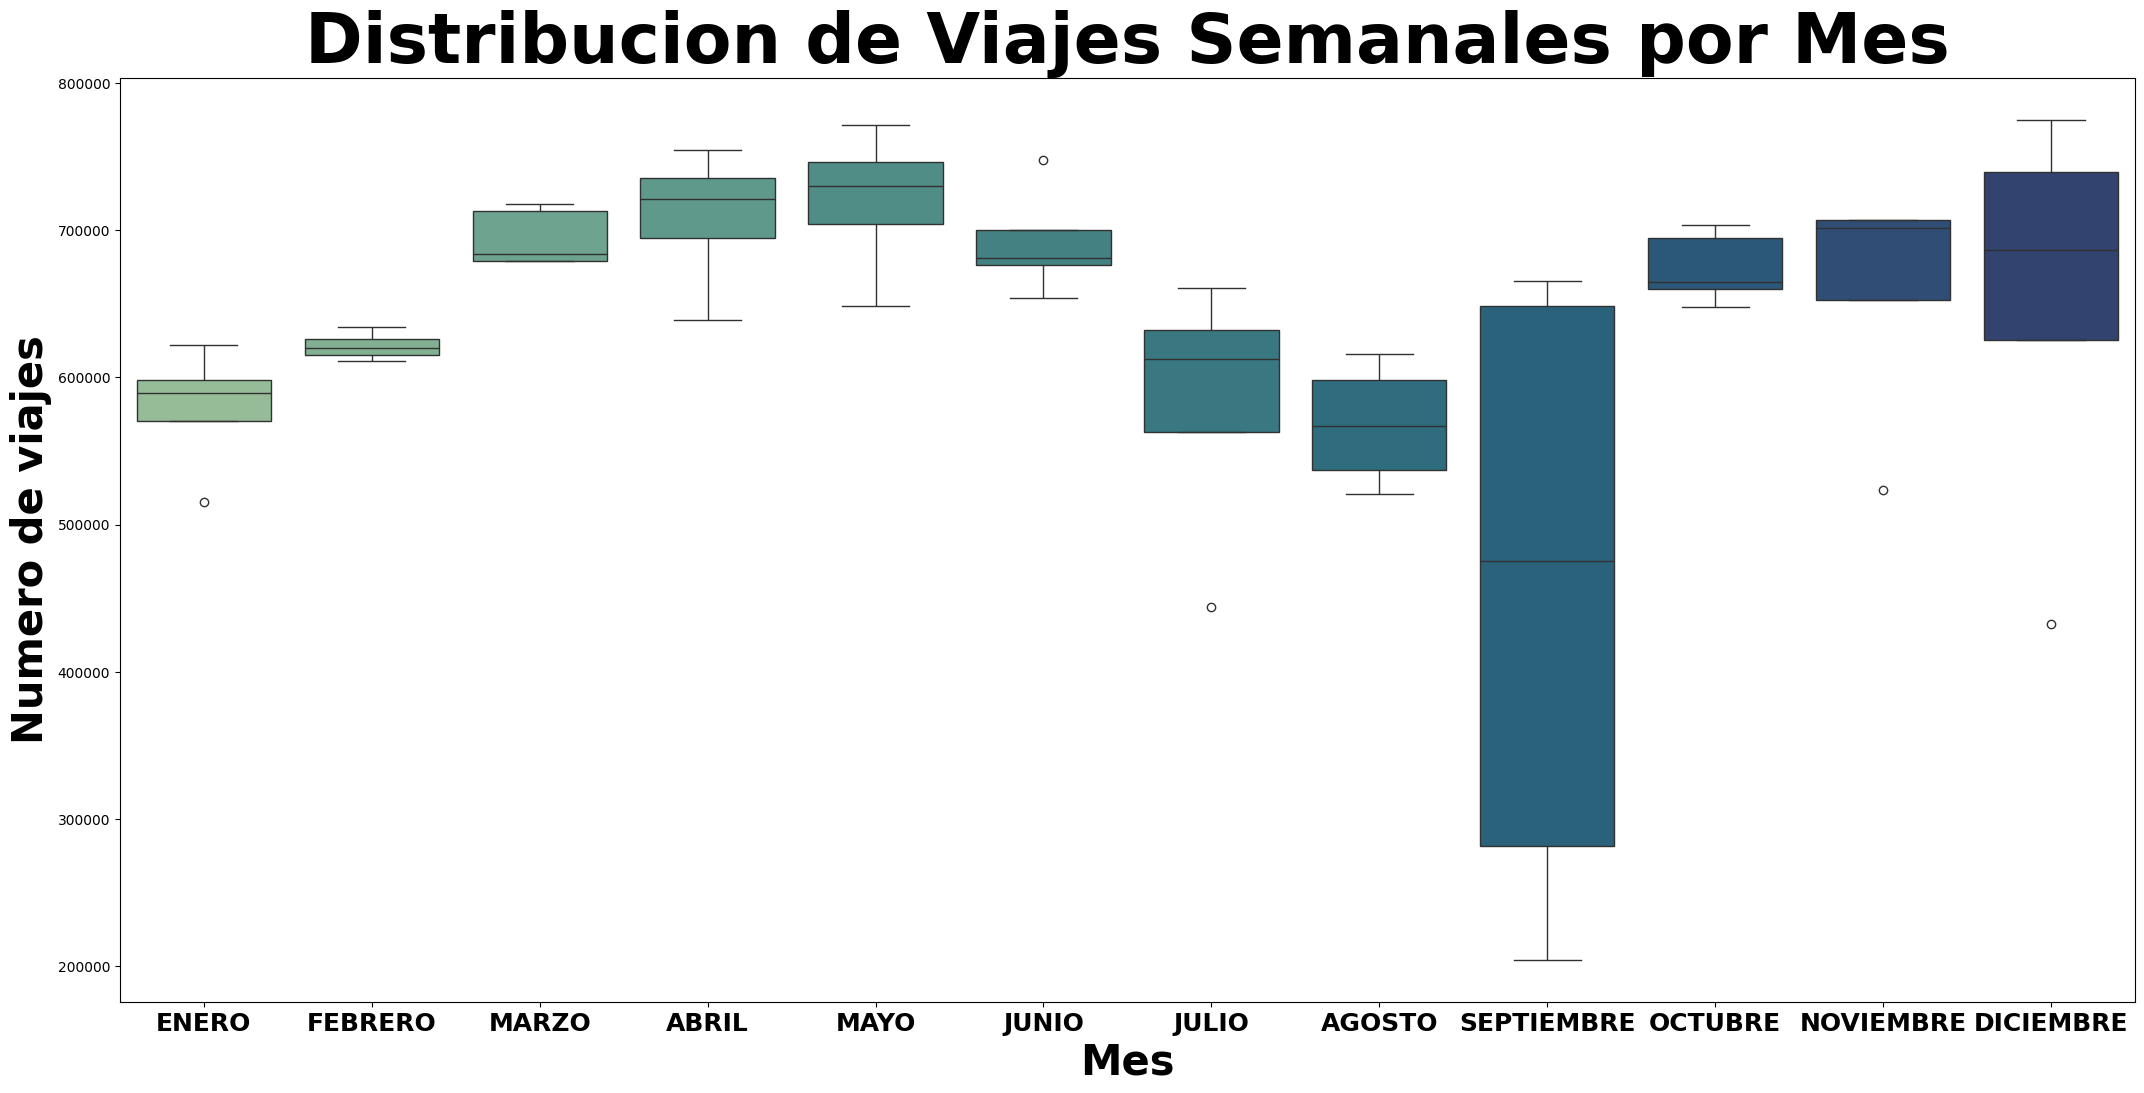

In [31]:
plt.figure(figsize = (26,12))
sns.boxplot(data=semanal,x=semanal.index.month,y= semanal.n_trips, palette='crest')
plt.title('Distribucion de Viajes Semanales por Mes',fontsize = 50,fontweight='bold')
plt.xlabel('Mes',fontsize = 30,fontweight='bold')
plt.ylabel('Numero de viajes',fontsize = 30,fontweight='bold')
plt.xticks(ticks=range(0,12), labels=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE'], fontsize = 18,fontweight='bold')
plt.show()

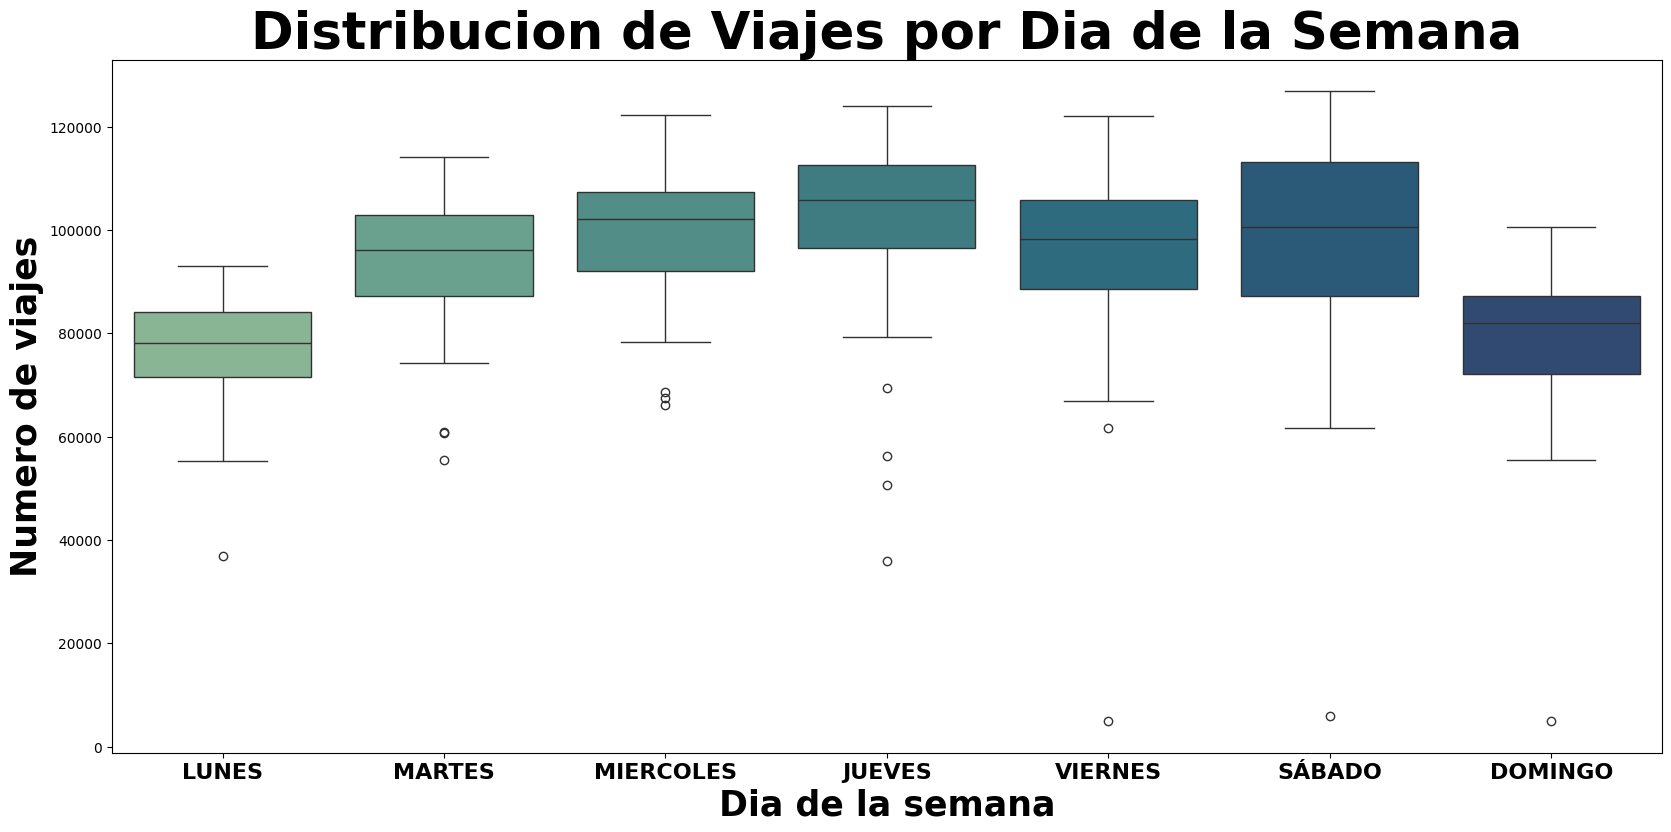

In [32]:
plt.figure(figsize = (20,9))
sns.boxplot(data=diario,x=diario.index.weekday,y= diario.n_trips, palette='crest')
plt.title('Distribucion de Viajes por Dia de la Semana',fontsize = 37,fontweight='bold')
plt.xlabel('Dia de la semana',fontsize = 25,fontweight='bold')
plt.ylabel('Numero de viajes',fontsize = 25,fontweight='bold')
plt.xticks(ticks=range(0,7), labels=['LUNES','MARTES','MIERCOLES','JUEVES','VIERNES','SÁBADO','DOMINGO'],fontsize = 16,fontweight='bold')
plt.show()

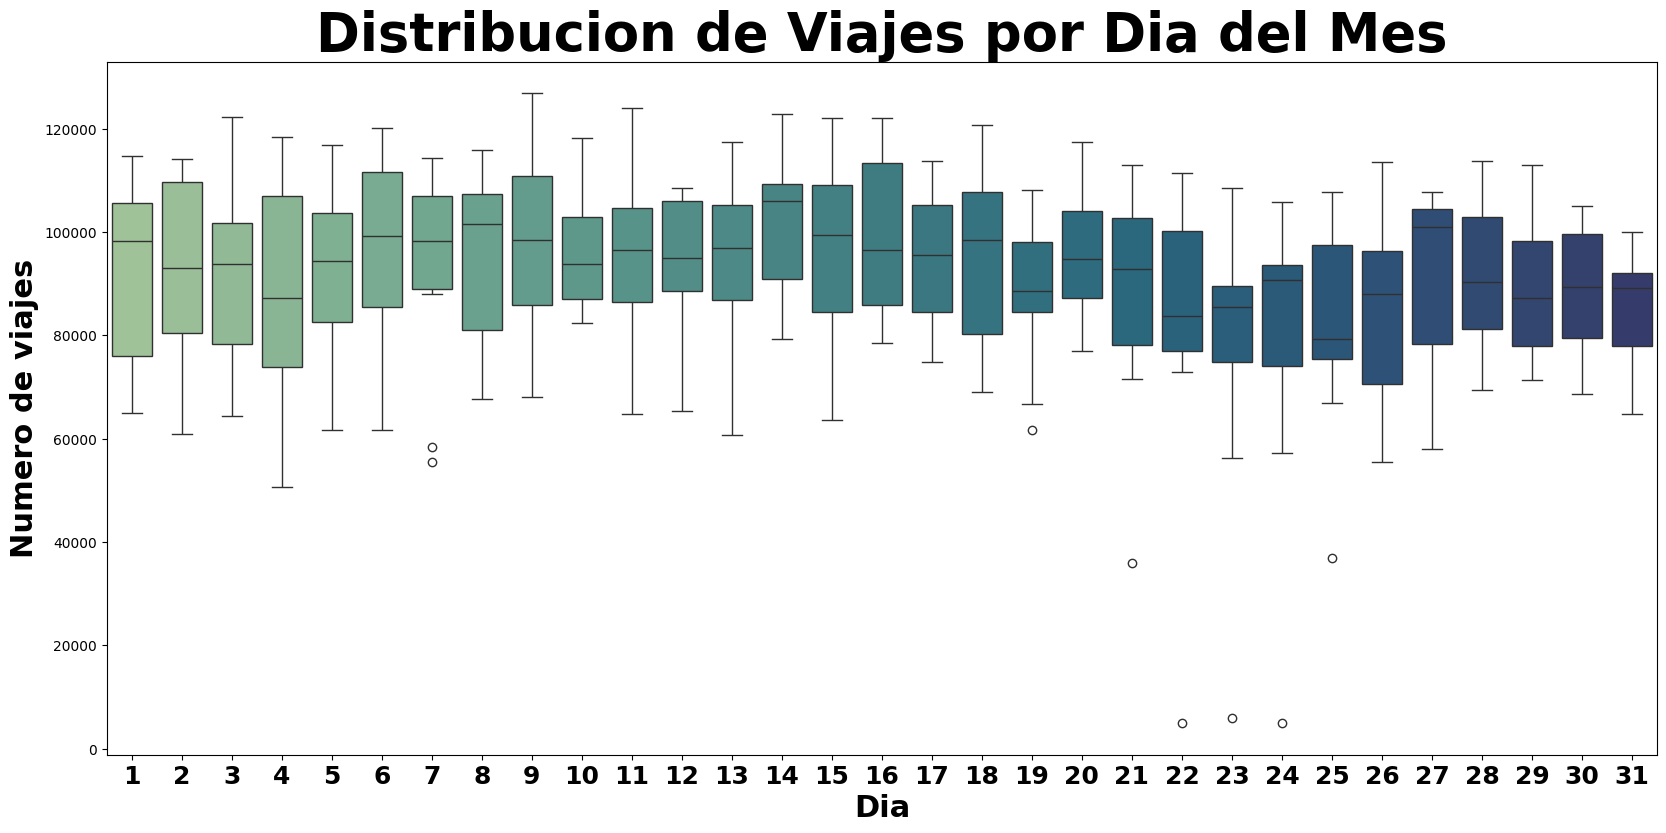

In [33]:
plt.figure(figsize = (20,9))
sns.boxplot(data=diario,x=diario.index.day,y= diario.n_trips, palette='crest')
plt.title('Distribucion de Viajes por Dia del Mes',fontsize = 38,fontweight='bold')
plt.xlabel('Dia',fontsize = 22,fontweight='bold')
plt.ylabel('Numero de viajes',fontsize = 22,fontweight='bold')
plt.xticks(fontsize = 18,fontweight='bold')
plt.show()

Se revisa si existen valores para todo el año de análisis

In [34]:
diario.shape[0]

366

## Interpolacion

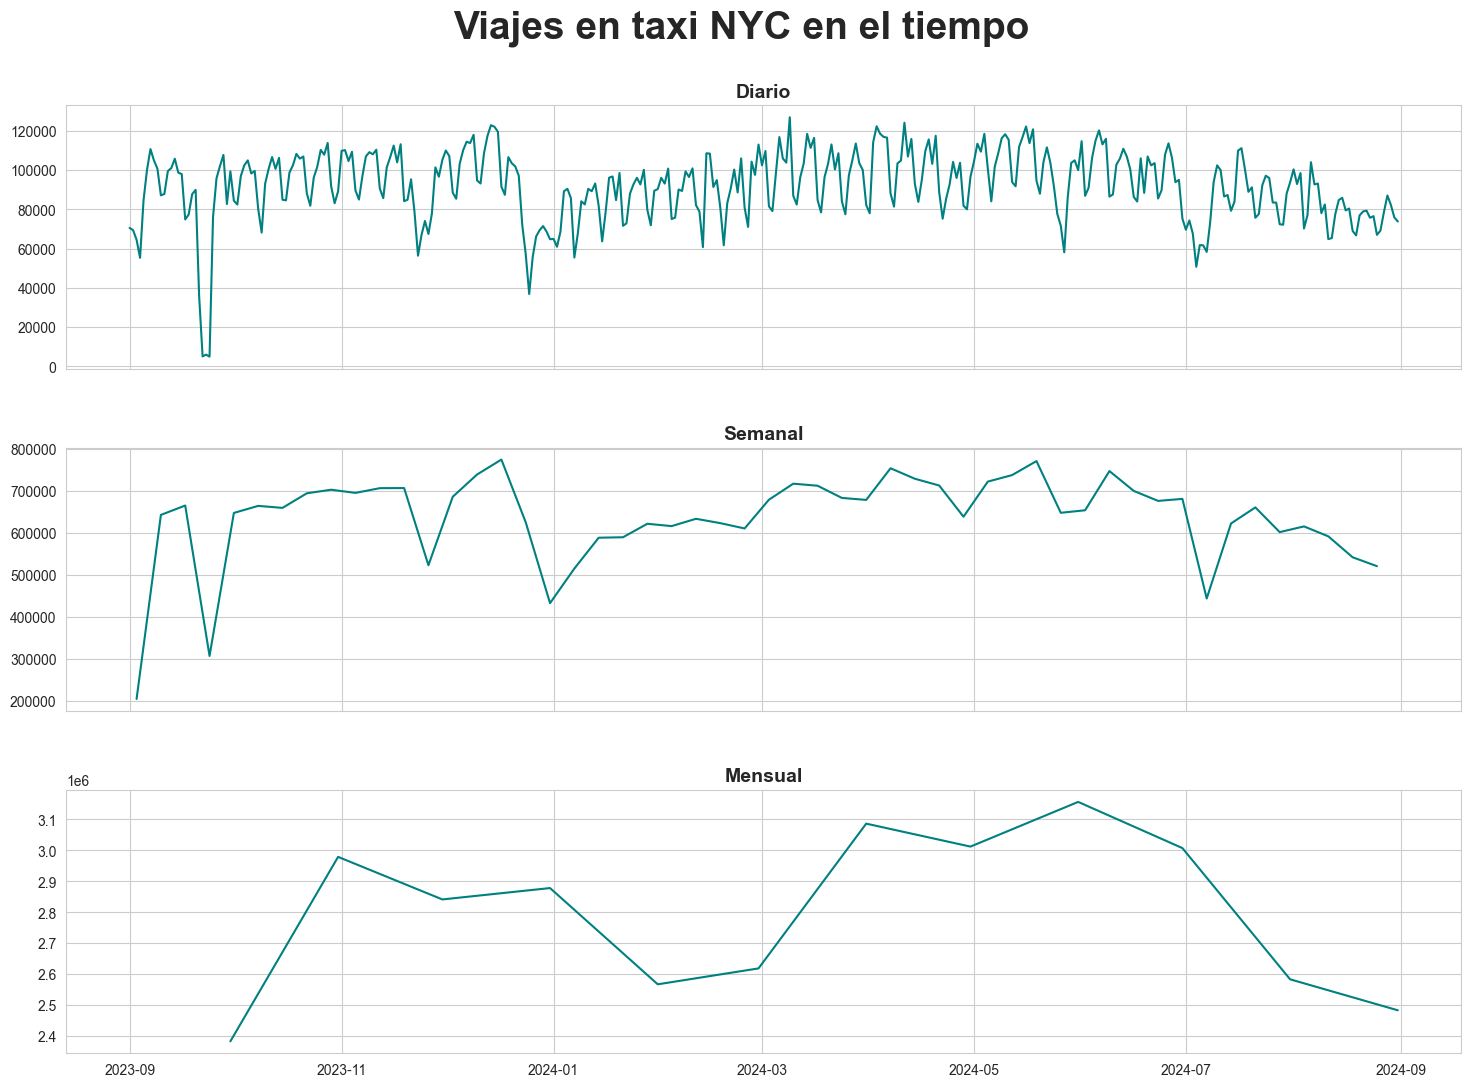

In [35]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,1, figsize = (18,12), gridspec_kw={'height_ratios': [1, 1, 1]}, sharex=True)
fig.suptitle("Viajes en taxi NYC en el tiempo",fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.3)

ax[2].plot(mensual.index, mensual.n_trips, color='teal')
ax[2].set_title('Mensual',fontsize=14, fontweight='bold')

ax[1].plot(semanal.index, semanal.n_trips, color='teal')
ax[1].set_title('Semanal',fontsize=14, fontweight='bold')

ax[0].plot(diario.index, diario.n_trips, color='teal')
ax[0].set_title('Diario',fontsize=14, fontweight='bold')



plt.show()

### Diario

In [36]:
pd.set_option('display.max_rows', None)
print(diario['n_trips'])
pd.reset_option('display.max_rows')

pickup_datetime
2023-09-01     70507
2023-09-02     69369
2023-09-03     64477
2023-09-04     55272
2023-09-05     84509
2023-09-06    100073
2023-09-07    110657
2023-09-08    104886
2023-09-09    100666
2023-09-10     87088
2023-09-11     87816
2023-09-12     99444
2023-09-13    101019
2023-09-14    105758
2023-09-15     98692
2023-09-16     97918
2023-09-17     74832
2023-09-18     77363
2023-09-19     87736
2023-09-20     89885
2023-09-21     35999
2023-09-22      5058
2023-09-23      5976
2023-09-24      4948
2023-09-25     76031
2023-09-26     95753
2023-09-27    102004
2023-09-28    107686
2023-09-29     82673
2023-09-30     99312
2023-10-01     84361
2023-10-02     82442
2023-10-03     96914
2023-10-04    102379
2023-10-05    104906
2023-10-06     98248
2023-10-07     99506
2023-10-08     80241
2023-10-09     68137
2023-10-10     93007
2023-10-11    100521
2023-10-12    106604
2023-10-13    100595
2023-10-14    106174
2023-10-15     84855
2023-10-16     84554
2023-10-17     987

In [37]:
diario.drop(diario[diario.index <= '2023-09-04'].index, inplace=True)

Se interpolan valores para los rangos que presentan variaciones muy bruscas. Estos periodos fueron los siguientes:<br>
- 2023-09-21 a 2023-09-24
- 2023-12-24 a 2023-12-26
- 2024-05-27
- 2024-07-04 a 2024-07-07

In [38]:
diario[((diario.index>='2023-09-21')&(diario.index<='2023-09-24'))
       |((diario.index>='2023-12-24')&(diario.index<='2023-12-26'))
       |(diario.index== '2024-05-27')
       |((diario.index>='2024-07-04')&(diario.index<='2024-07-07'))]

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-21,43021,62668.65,765316.16,501963.250000,35999
2023-09-22,5354,7286.19,115360.99,77889.883333,5058
2023-09-23,6256,9067.47,136119.87,90714.366667,5976
2023-09-24,5183,7551.59,105704.35,64612.383333,4948
2023-12-24,85232,107129.12,1093042.20,625622.900000,57191
2023-12-25,55224,74794.11,729834.62,414490.800000,36849
2023-12-26,82423,105461.84,1159496.00,691817.716667,55589
2024-05-27,78573,115043.99,1094157.04,603141.816667,58083
2024-07-04,71354,102745.78,986941.70,560544.266667,50714


In [39]:
diario.loc[
    ((diario.index >= '2023-09-21') & (diario.index <= '2023-09-24')) |
    ((diario.index >= '2023-12-24') & (diario.index <= '2023-12-26')) |
    (diario.index == '2024-05-27') |
    ((diario.index >= '2024-07-04') & (diario.index <= '2024-07-07')),
    'n_trips'
] = np.nan

In [40]:
diario[((diario.index>='2023-09-21')&(diario.index<='2023-09-24'))
       |((diario.index>='2023-12-24')&(diario.index<='2023-12-26'))
       |(diario.index== '2024-05-27')
       |((diario.index>='2024-07-04')&(diario.index<='2024-07-07'))]

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-21,43021,62668.65,765316.16,501963.250000,NaN
2023-09-22,5354,7286.19,115360.99,77889.883333,NaN
2023-09-23,6256,9067.47,136119.87,90714.366667,NaN
2023-09-24,5183,7551.59,105704.35,64612.383333,NaN
2023-12-24,85232,107129.12,1093042.20,625622.900000,NaN
2023-12-25,55224,74794.11,729834.62,414490.800000,NaN
2023-12-26,82423,105461.84,1159496.00,691817.716667,NaN
2024-05-27,78573,115043.99,1094157.04,603141.816667,NaN
2024-07-04,71354,102745.78,986941.70,560544.266667,NaN


In [41]:
diario.isnull().sum()

passenger_count     0
trip_distance       0
total_amount        0
duration            0
n_trips            12
dtype: int64

In [42]:
diario = diario.interpolate() 

In [43]:
diario.isnull().sum()

passenger_count    0
trip_distance      0
total_amount       0
duration           0
n_trips            0
dtype: int64

In [44]:
diario[(diario.index== '2023-09-04')|((diario.index>='2023-09-21')&(diario.index<='2023-09-24'))
       |((diario.index>='2023-12-24')&(diario.index<='2023-12-26'))
       |(diario.index== '2024-05-27')
       |((diario.index>='2024-07-04')&(diario.index<='2024-07-07'))]

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-21,43021,62668.65,765316.16,501963.250000,87114.2
2023-09-22,5354,7286.19,115360.99,77889.883333,84343.4
2023-09-23,6256,9067.47,136119.87,90714.366667,81572.6
2023-09-24,5183,7551.59,105704.35,64612.383333,78801.8
2023-12-24,85232,107129.12,1093042.20,625622.900000,70611.5
2023-12-25,55224,74794.11,729834.62,414490.800000,69135.0
2023-12-26,82423,105461.84,1159496.00,691817.716667,67658.5
2024-05-27,78573,115043.99,1094157.04,603141.816667,78836.5
2024-07-04,71354,102745.78,986941.70,560544.266667,68753.6


### Semanal

In [45]:
semanal = diario.resample('W').sum()

In [46]:
semanal.head(50)

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-10,768943,1074984.19,12611839.64,7.921366e+06,587879.0
2023-09-17,860067,1215057.15,14395656.38,9.061134e+06,665479.0
2023-09-24,379317,536201.11,6733854.78,4.294240e+06,586816.0
2023-10-01,840174,1177465.37,13800304.01,8.531493e+06,647820.0
2023-10-08,871700,1223806.22,14176927.80,8.775225e+06,664636.0
2023-10-15,865999,1207735.18,14104448.20,8.814019e+06,659893.0
2023-10-22,907592,1277345.21,14942243.25,9.348573e+06,694663.0
2023-10-29,918159,1294032.09,15201975.82,9.523136e+06,703160.0
2023-11-05,913241,1266912.80,14828373.80,9.198919e+06,695607.0


Se interpolan valores para los rangos que presentan variaciones muy bruscas. Estos periodos fueron los siguientes:<br>
- 2023-11-26
- 2023-12-31
- 2024-07-07

In [47]:
semanal.drop(semanal.index[0], inplace=True)

In [48]:
semanal[semanal['n_trips']<550000]

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-11-26,725464,930497.46,10809573.30,6.588956e+06,523258.0
2023-12-31,638569,824306.71,8947461.68,5.401852e+06,477130.5
2024-01-07,697427,974924.04,10305327.02,5.835861e+06,515268.0
2024-07-07,601178,849078.42,8832286.18,5.101118e+06,493565.0
2024-08-18,701994,1027746.06,11102370.29,6.588470e+06,542145.0
2024-08-25,676650,993720.62,10689481.81,6.351963e+06,520917.0
2024-09-01,604024,881681.17,9495359.99,5.637230e+06,466609.0


In [49]:
semanal[(semanal.index== '2023-11-26')
       |(semanal.index== '2023-12-31')
       |(semanal.index=='2024-07-07')]

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-11-26,725464,930497.46,10809573.30,6.588956e+06,523258.0
2023-12-31,638569,824306.71,8947461.68,5.401852e+06,477130.5
2024-07-07,601178,849078.42,8832286.18,5.101118e+06,493565.0


In [50]:
semanal.loc[(semanal.index== '2023-11-26')
            |(semanal.index== '2023-12-31')
            |(semanal.index=='2024-07-07'),
            'n_trips'
            ] = np.nan

In [51]:
semanal = semanal.interpolate() 

In [52]:
semanal.isnull().sum()

passenger_count    0
trip_distance      0
total_amount       0
duration           0
n_trips            0
dtype: int64

In [53]:
semanal[(semanal.index== '2023-11-26')
        |(semanal.index== '2023-12-31')
        |(semanal.index=='2024-07-07')]

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-11-26,725464,930497.46,10809573.30,6.588956e+06,696755.50
2023-12-31,638569,824306.71,8947461.68,5.401852e+06,577123.25
2024-07-07,601178,849078.42,8832286.18,5.101118e+06,652027.00


In [54]:
semanal

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-17,860067,1215057.15,14395656.38,9.061134e+06,665479.00
2023-09-24,379317,536201.11,6733854.78,4.294240e+06,586816.00
2023-10-01,840174,1177465.37,13800304.01,8.531493e+06,647820.00
2023-10-08,871700,1223806.22,14176927.80,8.775225e+06,664636.00
2023-10-15,865999,1207735.18,14104448.20,8.814019e+06,659893.00
2023-10-22,907592,1277345.21,14942243.25,9.348573e+06,694663.00
2023-10-29,918159,1294032.09,15201975.82,9.523136e+06,703160.00
2023-11-05,913241,1266912.80,14828373.80,9.198919e+06,695607.00
2023-11-12,917584,1287744.16,15064418.04,9.486671e+06,706870.00


In [55]:
semanal.drop(semanal[semanal.index >= '2024-08-11'].index,inplace=True)

### Mensual

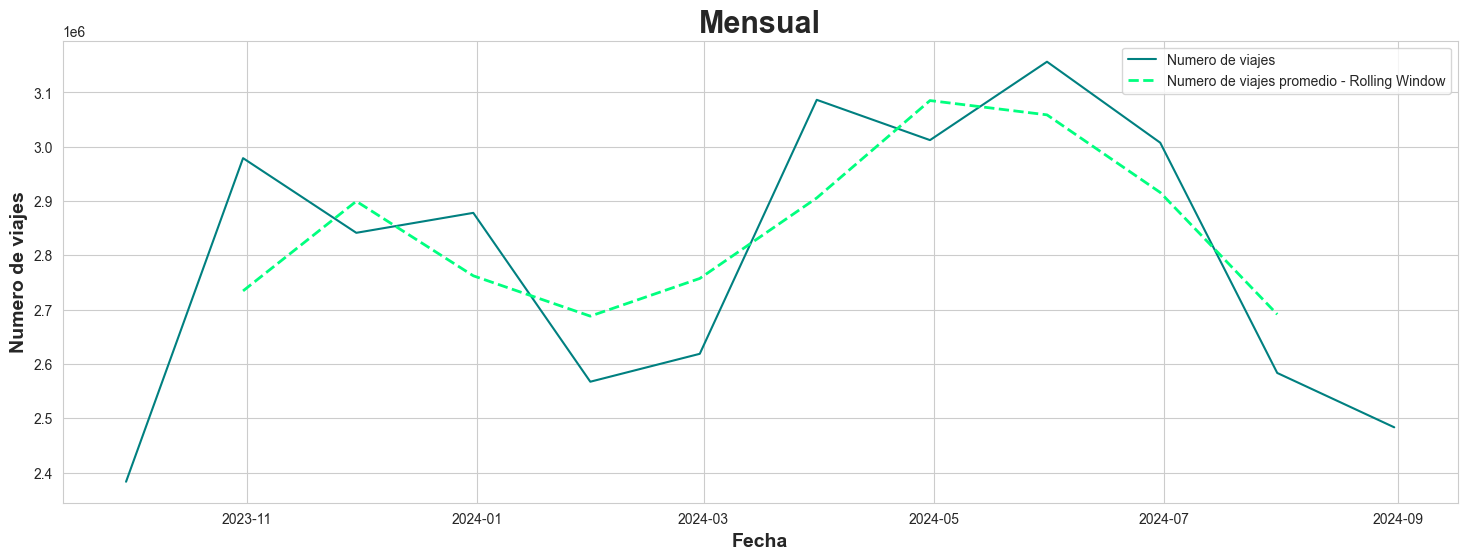

In [58]:
plt.figure(figsize=(18,6))
ventana = (3)
mensual_promedio_tendencia = mensual.n_trips.rolling(window=ventana, center = True).mean()
plt.plot(mensual.index, mensual.n_trips, label = 'Numero de viajes', color='teal')
plt.plot(mensual_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
plt.xlabel('Fecha',fontsize=14, fontweight='bold')
plt.ylabel('Numero de viajes',fontsize=14, fontweight='bold')
plt.title('Mensual',fontsize=22, fontweight='bold')
plt.legend()

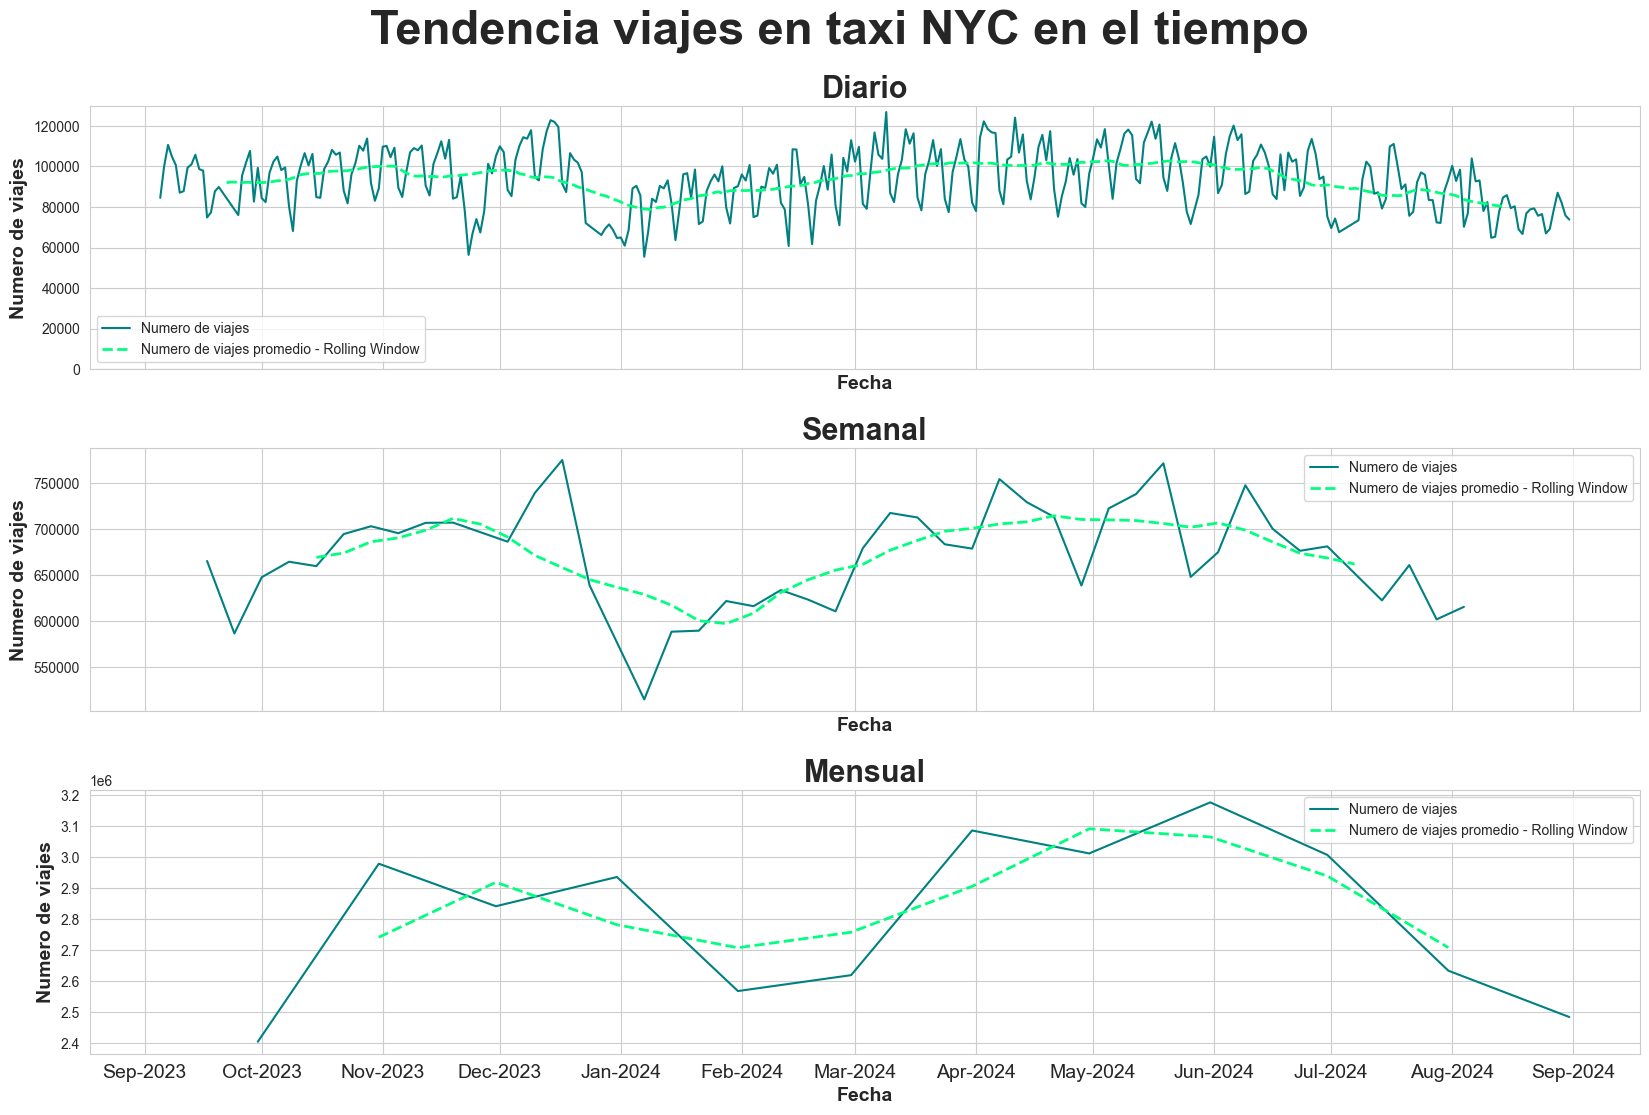

In [69]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,1, figsize = (20,12), gridspec_kw={'height_ratios': [1, 1, 1]}, sharex=True)
fig.suptitle("Tendencia viajes en taxi NYC en el tiempo",fontsize=34, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.3)

ax[-1].tick_params(axis='x', labelsize=14)
ax[-1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax[-1].xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 

ventana = (35)
diario_promedio_tendencia = diario.n_trips.rolling(window=ventana, center = True).mean()
ax[0].plot(diario.index, diario.n_trips, label = 'Numero de viajes', color='teal')
ax[0].plot(diario_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[0].set_xlabel('Fecha',fontsize=14, fontweight='bold')
ax[0].set_ylabel('Numero de viajes',fontsize=14, fontweight='bold')
ax[0].set_title('Diario',fontsize=22, fontweight='bold')
ax[0].set_ylim(0,130000)
ax[0].legend()

ventana = (9)
semanal_promedio_tendencia = semanal.n_trips.rolling(window=ventana, center = True).mean()
ax[1].plot(semanal.index, semanal.n_trips, label = 'Numero de viajes', color='teal')
ax[1].plot(semanal_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[1].set_xlabel('Fecha',fontsize=14, fontweight='bold')
ax[1].set_ylabel('Numero de viajes',fontsize=14, fontweight='bold')
ax[1].set_title('Semanal',fontsize=22, fontweight='bold')
ax[1].legend()

ventana = (3)
mensual_promedio_tendencia = mensual.n_trips.rolling(window=ventana, center = True).mean()
ax[2].plot(mensual.index, mensual.n_trips, label = 'Numero de viajes', color='teal')
ax[2].plot(mensual_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[2].set_xlabel('Fecha',fontsize=14, fontweight='bold')
ax[2].set_ylabel('Numero de viajes',fontsize=14, fontweight='bold')
ax[2].set_title('Mensual',fontsize=22, fontweight='bold')
ax[2].legend()


plt.show()

In [70]:
result_d = seasonal_decompose(diario.n_trips, model='additive')

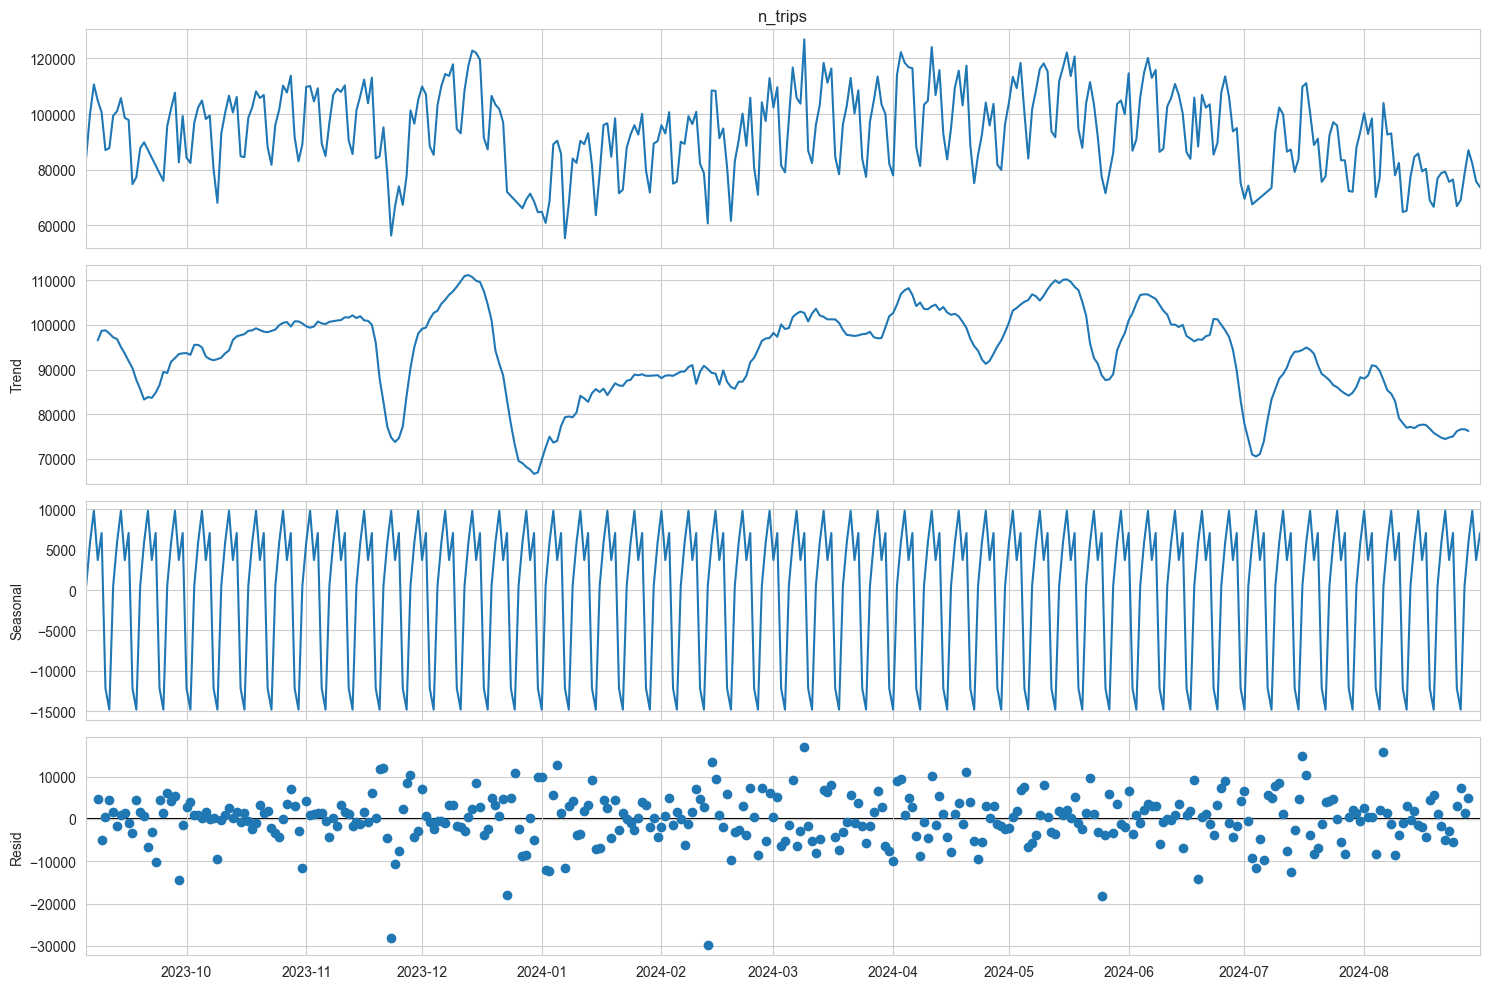

In [71]:
matplotlib.rcParams['figure.figsize'] = [15,10]
result_d.plot()
plt.show()


## Estacionariedad

In [60]:
#H0: No es estacionaria
#H1: Es estacionaria
def adfuller_test(trips):
    result = adfuller(trips)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print('Es estacionaria.')
    else:
        print('No es estacionaria.')

In [73]:
adfuller_test(diario.n_trips)

ADF Test Statistic : -3.139692525320361
p-value : 0.023751837758042283
#Lags Used : 15
Number of Observations Used : 346
Es estacionaria.


In [74]:
adfuller_test(semanal.n_trips)

ADF Test Statistic : -3.1430268483560035
p-value : 0.02352857488261235
#Lags Used : 0
Number of Observations Used : 46
Es estacionaria.


In [61]:
adfuller_test(mensual.n_trips)

ADF Test Statistic : -1.5928645466318694
p-value : 0.48717689601261727
#Lags Used : 3
Number of Observations Used : 8
No es estacionaria.


In [ ]:
# diario.to_csv('diario.csv')
# semanal.to_csv('semanal.csv')
# mensual.to_csv('mensual.csv')